In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))


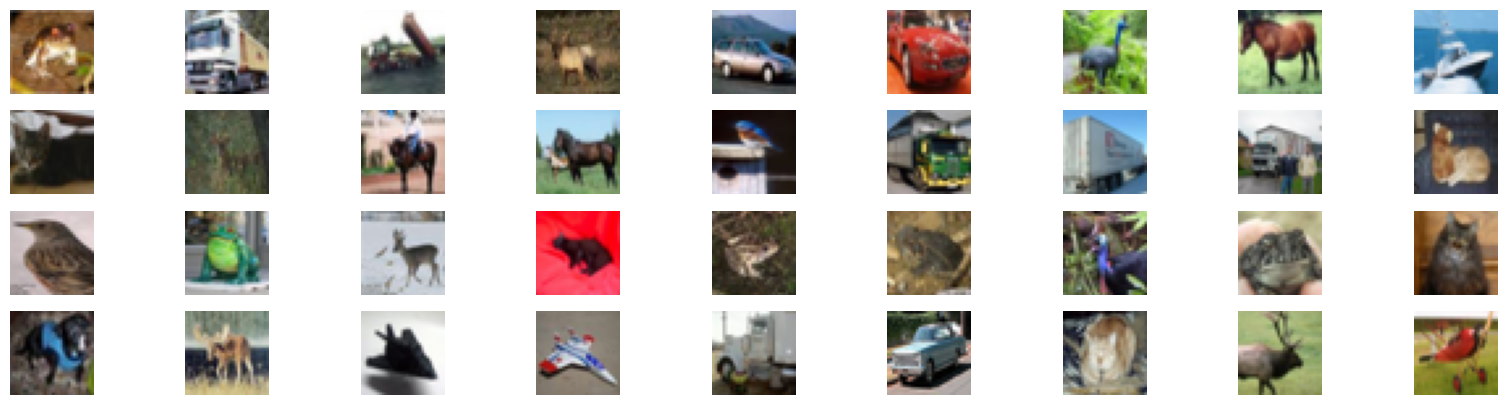

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.figure(figsize=(20,5))
for i in range(36):
    plt.subplot(4, 9, i+1) 
    plt.axis('off')
    plt.imshow(x_train[i], 'gray')       

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)   

print(np.unique(y_train, return_counts = True)) 

x_train = x_train/255.0
x_test = x_test /255.0 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 2. 모델


In [7]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2), input_shape=(32,32,3), padding='same', activation='relu')) # output shape = 28, 28, 128
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))     
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))                    
model.add(Conv2D(filters=16, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=8, kernel_size=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        8224      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                    

# 3. 컴파일 및 훈련

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras34_1_mnist.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=32, batch_size=256, validation_split=0.2, callbacks=[ES, MCP])

Epoch 1/32
157/157 [==============================] - 5s 15ms/step - loss: 1.9942 - acc: 0.2528 - val_loss: 1.7746 - val_acc: 0.3581
Epoch 2/32
157/157 [==============================] - 2s 12ms/step - loss: 1.6715 - acc: 0.3913 - val_loss: 1.6086 - val_acc: 0.4163
Epoch 3/32
157/157 [==============================] - 2s 12ms/step - loss: 1.5410 - acc: 0.4358 - val_loss: 1.5164 - val_acc: 0.4601
Epoch 4/32
157/157 [==============================] - 2s 12ms/step - loss: 1.4557 - acc: 0.4700 - val_loss: 1.4212 - val_acc: 0.4883
Epoch 5/32
157/157 [==============================] - 2s 12ms/step - loss: 1.3847 - acc: 0.5004 - val_loss: 1.4038 - val_acc: 0.4957
Epoch 6/32
157/157 [==============================] - 2s 12ms/step - loss: 1.3319 - acc: 0.5206 - val_loss: 1.3595 - val_acc: 0.5194
Epoch 7/32
157/157 [==============================] - 2s 12ms/step - loss: 1.2791 - acc: 0.5404 - val_loss: 1.2926 - val_acc: 0.5375
Epoch 8/32
157/157 [==============================] - 2s 12ms/step - 

# 4. 평가 및 예측

In [9]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9674 - acc: 0.6624
loss:  0.9674258828163147 acc:  0.6624000072479248
